In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

#### USA HOUSING dataset
- `Avg. Area Income`
- `Avg. Area House Age`
- `Avg. Area Number of Rooms`
- `Avg. Area Number of Bedrooms`
- `Area Population`
- `Price`
- `Address`

In [2]:
df = pd.read_csv('./datasets/USA_Housing.csv')

display(df.info())
display(df.head(3))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


None

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


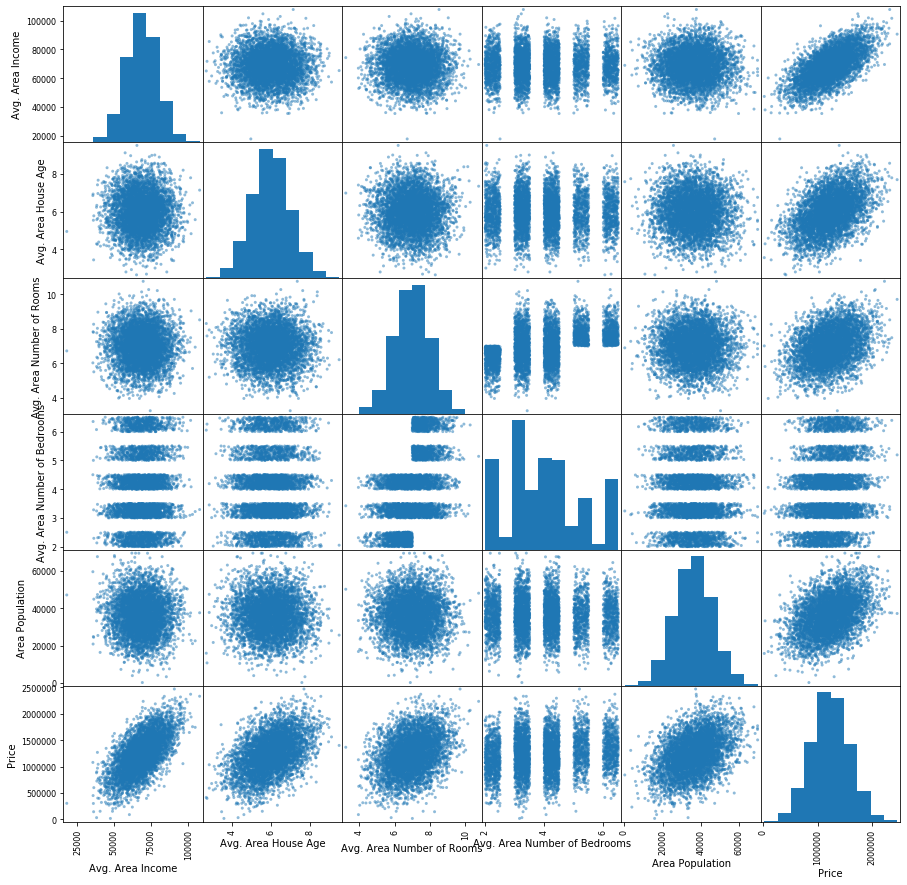

In [3]:
pd.plotting.scatter_matrix(df, figsize=(15,15))
plt.show()

# Multiple Linear Regression
- Model: $\hat{y} = \theta_0 + \theta_1\ x_1 + \theta_2\ x_2 + ... + \theta_n\ x_n$
    + $\theta_0$: is called intercept
- Fit for multiple variable - High dimension data

#### MSE Loss
$$\begin{align*}
L(\theta, X, Y) &= \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 \\
    &= \frac{1}{n} \sum\limits_{i=1}^n (y_i - (\theta_0 + \theta_1\ x_{1} + \theta_2\ x_{2} + ... + \theta_n\ x_{n}))^2
\end{align*}$$

In [4]:
X = df[[
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population']]
y = df[['Price']]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit
model = LinearRegression()
model.fit(X, y)

# Loss and predictions
y_pred = model.predict(X)
loss = mean_squared_error(
    y_true=y,
    y_pred=y_pred)
print('loss =', loss)

# Parameters
print('Thetas: ' , model.coef_)
print('Theta_0 :', model.intercept_)

loss = 10219734313.253004
Thetas:  [[2.15780494e+01 1.65637027e+05 1.20659949e+05 1.65113905e+03
  1.52007439e+01]]
Theta_0 : [-2637299.03332813]


# Evaluate Model performance
- Dont rely on a single metric to evaluate the performance of our model
    + Being better in one metric does not mean we will get good values for other metrics
    + If a model is poor in one metric such as losses => we can disregard the model
    
## Losses
- Some loss metrics(Eg: MSE, MAE) are greatly affected by outliers
    + Some outliers in the data may push the mean loss value up
- We should combine multiple loss function to evaluate performance

#### Mean Squared Error - MSE
$$
MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2
$$

#### Mean Absolute Error - MAE
$$
MAE = \frac{1}{n} \sum\limits_{i=1}^n |y_i - \hat{y}_i|
$$

#### Median Absolute Error

#### Absolute Percentage Error
$$
APE = \frac{|y - \hat{y}_i|}{y} 
$$

MSE loss =  10219734313.253004
MAE loss =  81359.27022837035
Median abs loss =  69842.48994684825


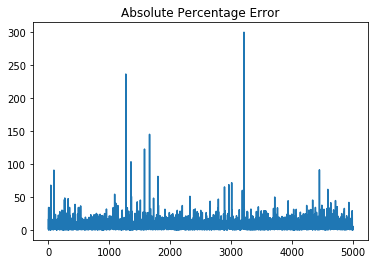

In [6]:
from sklearn.metrics import \
    mean_squared_error, \
    mean_absolute_error, \
    median_absolute_error

# MSE
mse_loss = mean_squared_error(
    y_true=y,
    y_pred=y_pred)
print('MSE loss = ', mse_loss)

# MAE
mae_loss = mean_absolute_error(
    y_true=y,
    y_pred=y_pred)
print('MAE loss = ',mae_loss)

# Median Absolute Error
median_abs_loss = median_absolute_error(
    y_true=y,
    y_pred=y_pred)
print('Median abs loss = ', median_abs_loss)

# Absolute Percentage Error
errors = np.abs((y-y_pred) / y) * 100

plt.plot(range(errors.shape[0]), errors)
plt.title("Absolute Percentage Error")
plt.show()

- Conclude
    + There are lots of outliers that affect MSE and MAE

## R2 Score

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(
    y_true=y,
    y_pred=y_pred)
print('R2 = ',r2)

R2 =  0.9180238195089553


=> R2 score is high but the model is not so good